Modules

In [4]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cenpy import products
import matplotlib.pyplot as plt

Set Up

In [5]:
# Define product
acs = products.ACS(2019)

**View a new census table**
https://api.census.gov/data/2019/acs/acs5/variables.html

In [6]:
# Download data
    # the v list is a list of the names of variables you want to input that then goes into the data pull
    # the level is 
v = []
counter = 1
while counter < 10:
    col = 'B08012_00'+str(counter)+'E'
    v.append(col)
    counter += 1

while counter < 40:
    col = 'B08012_0'+str(counter)+'E'
    v.append(col)
    counter += 1
    
v.append('B08013_001E')
v.append('B08013_002E')
v.append('B08013_003E')

In [7]:
new_table = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=v)

C:\Users\Lumin\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Lumin\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Lumin\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [8]:
# Calculate stats for the new data for a given column
new_table.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GEOID        14 non-null     object  
 1   geometry     14 non-null     geometry
 2   B08012_001E  14 non-null     float64 
 3   B08012_002E  14 non-null     float64 
 4   B08012_003E  14 non-null     float64 
 5   B08012_004E  14 non-null     float64 
 6   B08012_005E  14 non-null     float64 
 7   B08012_006E  14 non-null     float64 
 8   B08012_007E  14 non-null     float64 
 9   B08012_008E  14 non-null     float64 
 10  B08012_009E  14 non-null     float64 
 11  B08012_010E  14 non-null     float64 
 12  B08012_011E  14 non-null     float64 
 13  B08012_012E  14 non-null     float64 
 14  B08012_013E  14 non-null     float64 
 15  B08012_014E  14 non-null     float64 
 16  B08012_015E  14 non-null     float64 
 17  B08012_016E  14 non-null     float64 
 18  B08012_017E  14 non-null

In [9]:
new_table['B08013_002E'].sum()

343800.0

In [10]:
new_table['B08013_003E'].sum()

253860.0

*Important Data*: men have 343800 aggregate travel hours, as opposed to women's 253860.

<AxesSubplot:>

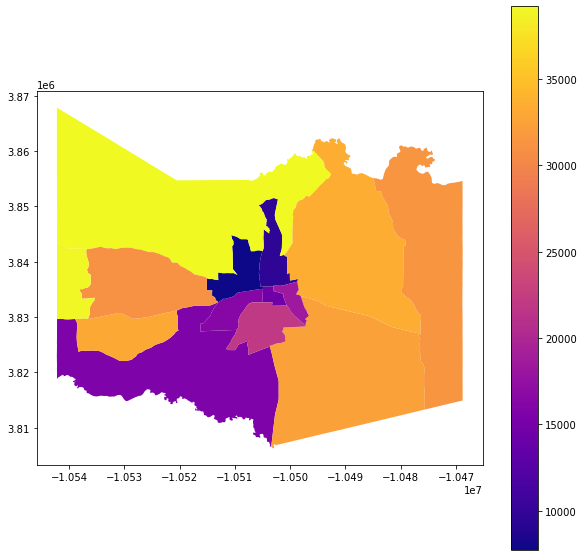

In [11]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
new_table.plot('B08013_002E', ax=ax, cmap='plasma', legend=True)

<AxesSubplot:>

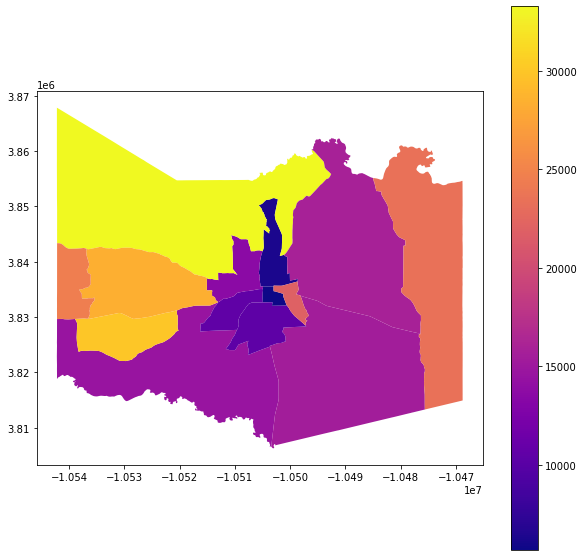

In [12]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
new_table.plot('B08013_003E', ax=ax, cmap='plasma', legend=True)

Columns of note:
B08012_001E = Total number of people polled per tract
B08012_014E = Total number of men per tract
B08012_027E = Total number of women per tract
B08012_012E + B08012_013E = Total numer of workers with a travel time > 60 minutes
B08012_025E + B08012_026E = Total numer of men with a travel time > 60 minutes
B08012_038E + B08012_039E = Total numer of women with a travel time > 60 minutes
B08013_001E = Aggregate travel hours
B08013_002E = Men's aggregate travel hours
B08013_003E = Men's aggregate travel hours

**Gather relevant information**

Base Variables:

In [13]:
base = pd.DataFrame()

def get_popmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_002E', 'B08012_003E', 'B08012_004E', 'B08012_005E', 'B08012_006E', 'B08012_007E', 'B08012_008E', 'B08012_009E', 'B08012_010E', 'B08012_011E', 'B08012_012E', 'B08012_013E']
        people = int(row[1][2])
        hpeople = people // 2
        currcol = ''
        
        while hpeople > 0:
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hpeople = hpeople - value # subtract the number of people in that category from the total
            
        infodict[row[1][47]] = currcol
        
    return infodict

def get_menmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_015E', 'B08012_016E', 'B08012_017E', 'B08012_018E', 'B08012_019E', 'B08012_020E', 'B08012_021E', 'B08012_022E', 'B08012_023E', 'B08012_024E', 'B08012_025E', 'B08012_026E']
        men = int(row[1][15])
        hmen = men // 2
        currcol = ''
        #print('new row', currcol)
        
        while hmen > 0:
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hmen = hmen - value # subtract the number of people in that category from the total
            
        #print('end while', currcol)
        infodict[row[1][47]] = currcol
        
    return infodict


def get_womenmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_028E', 'B08012_029E', 'B08012_030E', 'B08012_031E', 'B08012_032E', 'B08012_033E', 'B08012_034E', 'B08012_035E', 'B08012_036E', 'B08012_037E', 'B08012_038E', 'B08012_039E']
        women = int(row[1][28])
        hwomen = women // 2
        currcol = ''
        #print('new row', currcol)
        
        while hwomen > 0:
            #print('while   half women =', hwomen)
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hwomen = hwomen - value # subtract the number of people in that category from the total
            
        #print('end while', currcol)
        infodict[row[1][47]] = currcol
        
    return infodict

B08012_004 = 10-14
B08012_005 = 15-19
B08012_006 = 20-24
B08012_007 = 25-29
B08012_008 = 30-34

In [14]:
population_median_cols = get_popmedian(new_table)
population_median = ['15-19', '15-19', '10-14', '15-19', '20-24', '10-14', '20-24', '25-29', '10-14', '20-24', '25-29', '30-34', '10-14', '20-24']
population_median_cols

{'020604': 'B08012_005E',
 '020402': 'B08012_005E',
 '020501': 'B08012_004E',
 '020302': 'B08012_005E',
 '020603': 'B08012_006E',
 '020401': 'B08012_004E',
 '020103': 'B08012_006E',
 '020200': 'B08012_007E',
 '020502': 'B08012_004E',
 '020605': 'B08012_006E',
 '020104': 'B08012_007E',
 '020102': 'B08012_008E',
 '020301': 'B08012_004E',
 '020606': 'B08012_006E'}

B08012_017 = 10-14
B08012_018 = 15-19
B08012_019 = 20-24
B08012_020 = 25-29
B08012_021 = 30-35

In [15]:
men_median_cols = get_menmedian(new_table)
men_median = ['15-19', '15-19', '15-19', '15-19', '20-24', '10-14', '25-29', '25-29', '15-19', '20-24', '30-34', '30-34', '10-14', '20-24']
men_median_cols

{'020604': 'B08012_018E',
 '020402': 'B08012_018E',
 '020501': 'B08012_018E',
 '020302': 'B08012_018E',
 '020603': 'B08012_019E',
 '020401': 'B08012_017E',
 '020103': 'B08012_020E',
 '020200': 'B08012_020E',
 '020502': 'B08012_018E',
 '020605': 'B08012_019E',
 '020104': 'B08012_021E',
 '020102': 'B08012_021E',
 '020301': 'B08012_017E',
 '020606': 'B08012_019E'}

B08012_029 = 5-9
B08012_030 = 10-14
B08012_031 = 15-19
B08012_032 = 20-24
B08012_033 = 25-29
B08012_034 = 30-34

In [16]:
women_median_cols = get_womenmedian(new_table)
women_median = ['15-19', '10-14', '5-9', '15-19', '20-24', '10-14', '15-19', '25-29', '10-14', '20-24', '20-24', '30-34', '10-14', '20-24']
women_median_cols

{'020604': 'B08012_031E',
 '020402': 'B08012_030E',
 '020501': 'B08012_029E',
 '020302': 'B08012_031E',
 '020603': 'B08012_032E',
 '020401': 'B08012_030E',
 '020103': 'B08012_031E',
 '020200': 'B08012_033E',
 '020502': 'B08012_030E',
 '020605': 'B08012_032E',
 '020104': 'B08012_032E',
 '020102': 'B08012_034E',
 '020301': 'B08012_030E',
 '020606': 'B08012_032E'}

In [17]:
base['GEOID'] = new_table['GEOID']
base['geometry'] = new_table['geometry']
base['NAME'] = new_table['NAME']
base['state'] = new_table['state']
base['county'] = new_table['county']
base['tract'] = new_table['tract']
base['population_median'] = population_median
base['men_median'] = men_median
base['women_median'] = women_median

In [18]:
base

,GEOID,geometry,NAME,state,county,tract,population_median,men_median,women_median
0,48203020604,"POLYGON ((-10542200.570 3822928.240, -10542200...","Census Tract 206.04, Harrison County, Texas",48,203,020604,15-19,15-19,15-19
1,48203020402,"POLYGON ((-10516258.230 3827513.530, -10516257...","Census Tract 204.02, Harrison County, Texas",48,203,020402,15-19,15-19,10-14
2,48203020501,"POLYGON ((-10505033.890 3835034.510, -10505033...","Census Tract 205.01, Harrison County, Texas",48,203,020501,10-14,15-19,5-9
3,48203020302,"POLYGON ((-10505670.970 3837985.810, -10505667...","Census Tract 203.02, Harrison County, Texas",48,203,020302,15-19,15-19,15-19
4,48203020603,"POLYGON ((-10538910.080 3829652.730, -10538889...","Census Tract 206.03, Harrison County, Texas",48,203,020603,20-24,20-24,20-24
5,48203020401,"POLYGON ((-10515066.110 3834885.950, -10515061...","Census Tract 204.01, Harrison County, Texas",48,203,020401,10-14,10-14,10-14
6,48203020103,"POLYGON ((-10503682.240 3824785.580, -10503608...","Census Tract 201.03, Harrison County, Texas",48,203,020103,20-24,25-29,15-19
7,48203020200,"POLYGON ((-10542199.010 3861433.820, -10542197...","Census Tract 202, Harrison County, Texas",48,203,020200,25-29,25-29,25-29
8,48203020502,"POLYGON ((-10511655.170 3824200.700, -10511599...","Census Tract 205.02, Harrison County, Texas",48,203,020502,10-14,15-19,10-14
9,48203020605,"POLYGON ((-10538076.410 3834774.760, -10538075...","Census Tract 206.05, Harrison County, Texas",48,203,020605,20-24,20-24,20-24


In [19]:
pm_int = []
for item in population_median:
    if item == '5-9':
        pm_int.append(7)
        
    elif item == '10-14':
        pm_int.append(12)
        
    elif item == '15-19':
        pm_int.append(17)
        
    elif item == '20-24':
        pm_int.append(22)
        
    elif item == '25-29':
        pm_int.append(27)
        
    elif item == '30-34':
        pm_int.append(32)
        
base['pm_int'] = pm_int

In [20]:
wm_int = []
for item in women_median:
    if item == '5-9':
        wm_int.append(7)
        
    elif item == '10-14':
        wm_int.append(12)
        
    elif item == '15-19':
        wm_int.append(17)
        
    elif item == '20-24':
        wm_int.append(22)
        
    elif item == '25-29':
        wm_int.append(27)
        
    elif item == '30-34':
        wm_int.append(32)
        
base['wm_int'] = wm_int

In [21]:
mm_int = []
for item in men_median:
    if item == '5-9':
        mm_int.append(7)
        
    elif item == '10-14':
        mm_int.append(12)
        
    elif item == '15-19':
        mm_int.append(17)
        
    elif item == '20-24':
        mm_int.append(22)
        
    elif item == '25-29':
        mm_int.append(27)
        
    elif item == '30-34':
        mm_int.append(32)
        
    else:
        mm_int.append('problem')
        
base['mm_int'] = mm_int

In [22]:
base

,GEOID,geometry,NAME,state,county,tract,population_median,men_median,women_median,pm_int,wm_int,mm_int
0,48203020604,"POLYGON ((-10542200.570 3822928.240, -10542200...","Census Tract 206.04, Harrison County, Texas",48,203,020604,15-19,15-19,15-19,17,17,17
1,48203020402,"POLYGON ((-10516258.230 3827513.530, -10516257...","Census Tract 204.02, Harrison County, Texas",48,203,020402,15-19,15-19,10-14,17,12,17
2,48203020501,"POLYGON ((-10505033.890 3835034.510, -10505033...","Census Tract 205.01, Harrison County, Texas",48,203,020501,10-14,15-19,5-9,12,7,17
3,48203020302,"POLYGON ((-10505670.970 3837985.810, -10505667...","Census Tract 203.02, Harrison County, Texas",48,203,020302,15-19,15-19,15-19,17,17,17
4,48203020603,"POLYGON ((-10538910.080 3829652.730, -10538889...","Census Tract 206.03, Harrison County, Texas",48,203,020603,20-24,20-24,20-24,22,22,22
5,48203020401,"POLYGON ((-10515066.110 3834885.950, -10515061...","Census Tract 204.01, Harrison County, Texas",48,203,020401,10-14,10-14,10-14,12,12,12
6,48203020103,"POLYGON ((-10503682.240 3824785.580, -10503608...","Census Tract 201.03, Harrison County, Texas",48,203,020103,20-24,25-29,15-19,22,17,27
7,48203020200,"POLYGON ((-10542199.010 3861433.820, -10542197...","Census Tract 202, Harrison County, Texas",48,203,020200,25-29,25-29,25-29,27,27,27
8,48203020502,"POLYGON ((-10511655.170 3824200.700, -10511599...","Census Tract 205.02, Harrison County, Texas",48,203,020502,10-14,15-19,10-14,12,12,17
9,48203020605,"POLYGON ((-10538076.410 3834774.760, -10538075...","Census Tract 206.05, Harrison County, Texas",48,203,020605,20-24,20-24,20-24,22,22,22


In [23]:
# Compute correlation matrix
corr_matrix = base.corr()

# Display just house value correlations
#corr_matrix['population_median'].sort_values(ascending = False)

In [24]:
corr_matrix

,pm_int,wm_int,mm_int
pm_int,1.000000,0.939520,0.935032
wm_int,0.939520,1.000000,0.798898
mm_int,0.935032,0.798898,1.000000


In [25]:
base = gpd.GeoDataFrame(base, geometry = 'geometry')

<AxesSubplot:>

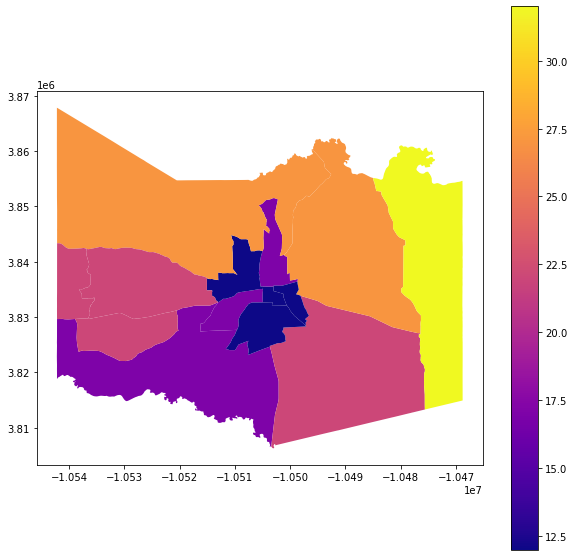

In [26]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
base.plot('pm_int', ax=ax, cmap='plasma', legend=True)

<AxesSubplot:>

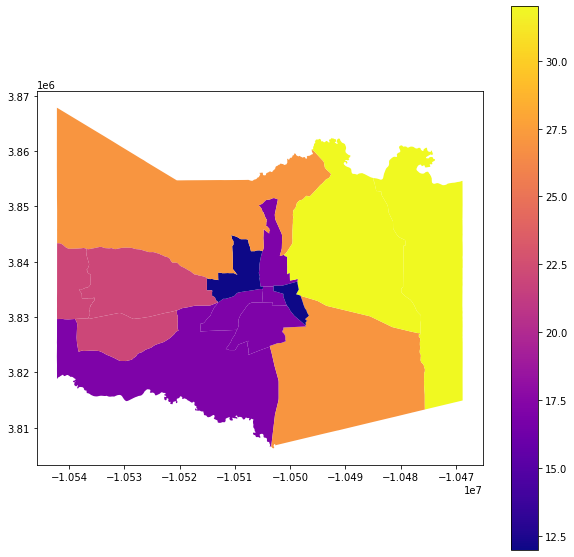

In [27]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
base.plot('mm_int', ax=ax, cmap='plasma', legend=True)

<AxesSubplot:>

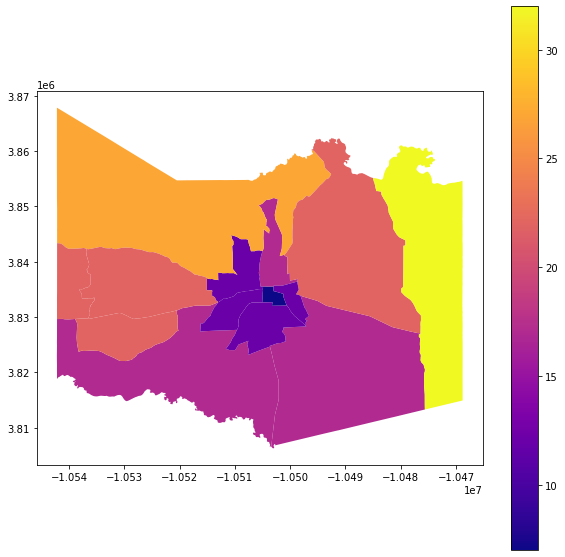

In [28]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
base.plot('wm_int', ax=ax, cmap='plasma', legend=True)